# 347 前k个大数问题，老生常谈，不得不谈
输入：非空的整数数组，频率k  
输出：前k个出现频率最高的元素

你可以假设给定的 k 总是合理的，且 1 ≤ k ≤ 数组中不相同的元素的个数。  
你的算法的时间复杂度必须优于 $O(nlogn)$ , n 是数组的大小。  
题目数据保证答案唯一，换句话说，数组中前 k 个高频元素的集合是唯一的。  
你可以按任意顺序返回答案  

## 思路
- 统计元素出现的频率  
- 对频率排序  
- 找出前 k 个高频元素

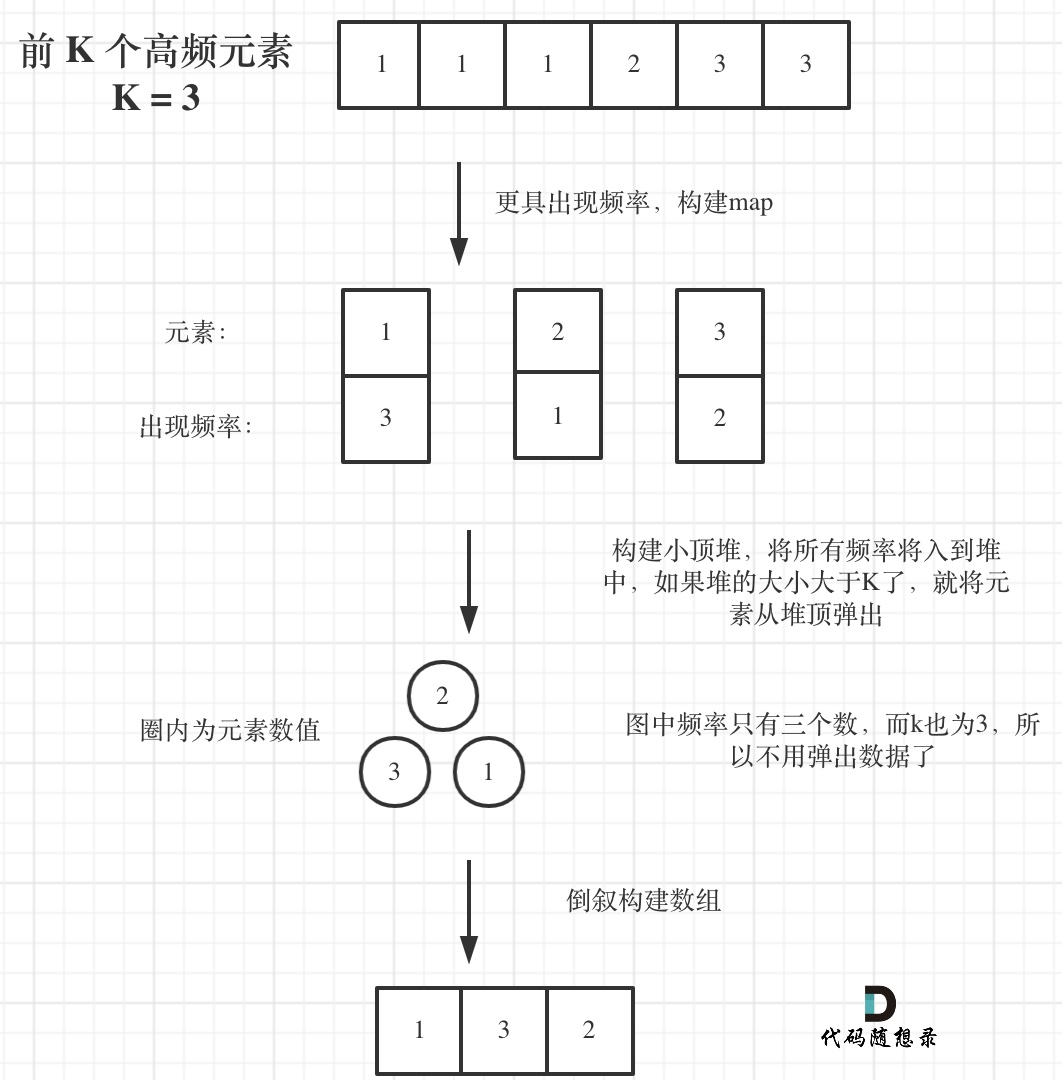

### 统计频率
通过map完成

### 对频率进行排序
容器适配器：优先级队列  

优先级队列实际是一个 **披着队列外衣的堆**   
- 只有两个接口：队头取元素，队尾添加元素  
- 自动依照元素的权值排列  

#### 优先级队列
利用大顶堆（max-heap）完成对元素的排序，是一个数组形式的完全二叉树  
**堆：**完全二叉树，树中每个结点的值都不小于（大顶堆）或者不大于（小顶堆）其左右孩子的值  

大小顶堆都可以直接用优先级队列实现  
**堆是一种实现优先队列的高效方式**

本题中使用的是**小顶堆**：  
- 需要的是频率最高的k个元素，大顶堆每次更新都把最大的元素弹出去， 无法保存  
- 用小顶堆每次将最小的元素弹出，最后留在小顶堆里的 k 个才是最大的元素

In [ ]:
'''
heapq：
专门用来实现 堆队列算法(Heap Queue Algorithm) 的模块 
不是一个单独的类，而是一个操作 list 的模块
功能：将一个列表原地转化为一个符合最小堆性质的结构

最小堆插入和删除一个元素的时间复杂度都是 O(log n)

# 堆中存储的格式：(频率, 元素值)
heapq.heappush(pri_que, (freq, key))

'''

'''
字典中的 get() 方法：dictionary.get(key, default_value)
key：需要查询的字典中的键
default_value：如果字典中不存在该键，函数返回的默认值

字典中的 keys() 方法：dictionary.keys()
返回一个 dict_keys 对象，并不是一个普通的列表！！
返回的是一个视图对象，与原字典实时关联，可迭代，支持集合操作
'''

In [ ]:
#时间复杂度：O(nlogk)
#空间复杂度：O(n)

import heapq
class Solution:
    def topKFrequent(self, nums:list[int], k:int) -> list[int]:
        # 初始化一个字典，统计元素出现的频率
        map_ = {}   # 避免与内置函数map的命名冲突
        for i in range(len(nums)):
            # 首先获取字典中当前元素的值，先读取字典中存储的频率，然后 +1
            # 第一次出现字典查找的默认值是0
            map_[nums[i]] = map_.get(nums[i], 0) + 1
        
        # 对频率排序，初始化一个大小为k的小顶堆
        pri_que = []  

        # 固定小顶堆大小为k，扫描所有频率的数值
        for key,freq in map_.items():
            # 向堆队列中添加一个元组(freq, key)，对应索引0和1
            heapq.heappush(pri_que, (freq, key))  
            if len(pri_que) > k:
                # 如果堆的大小大于了K，则队列弹出前面的最小值，保证堆的大小一直为k
                heapq.heappop(pri_que)

        # 找出top K个高频元素，小顶堆每次弹出最小的堆顶，留下来的频率由小到大需要倒序输出到数组
        result = [0] * k
        for i in range(k-1, -1, -1):
            # 从 k-1 下标依次递减到 0 
            # 最先弹出的频率最低的堆顶放在result的最后一个位置
            # 并获取频率值对应的元素（索引1）存储到result
            result[i] = heaqp.heappop(pri_que)[1]
        return result

# python太简洁了！！！

In [ ]:
# 使用字典统计出现的次数
# 桶排序，适合k值较大的场景
# 通常来讲 最小堆法 是更快的
class Solution:
    def topKFrequent(self, nums:list[int], k:int)-> list[int]:
        # 初始化一个字典统计数字出现次数
        # 不存在的键自动创建并复制0
        time_dict = defaultdict(int)
        for num in nums:
            time_dict[num] += 1
        
        # 索引字典，key为出现次数，value为相应次数的数字的集合(list)
        # 实际是桶排序：频率相同的元素放进一个桶中并集合成一个list
        # 每个桶的编号就是频率
        index_dict = defaultdict(list)
        for key in time_dict:
            index_dict[time_dict[key]].append(key)  # 就说绝不绝吧！

        # 频率大小排序
        key = list(index_dict.keys())   # 提取出所有的键（频率值列表）
        key.sort()   # 包含所有频率值并快速排序,排序后从小到大
        result = []
        count = 0   # 追踪已经收集的元素个数，直到满足k个
        while key and count != k:   # 获取前k项
            result += index_dict[key[-1]]  # 最高频率对应的元素列表全部加进result
            count += len(index_dict[key[-1]])   # 最高频率值在key的末尾
            key.pop()  # 当前最高频率处理完后及时移除
        
        return result[0:k]   # 返回时通过切片确保返回k个

## 补充：容器适配器
这是一个来自面向对象编程和数据结构领域的概念，尤其在 C++ 标准模板库（STL）中非常常见。

在 Python 算法的语境中，**容器适配器 (Container Adapter)** 是一种设计模式，它的作用是：

> **取一个基础的、功能全面的容器（如列表或双端队列），然后对它的接口进行限制或“适配”，使它只能按照特定的行为模式进行操作。**

简单来说，**容器适配器并不是一种新的数据结构，而是对现有数据结构的**封装和限制**。**

---

## 🛠️ 容器适配器的核心原理

想象一个多功能工具箱 (`deque`)，它有各种工具（`append`, `pop`, `appendleft`, `popleft`）。容器适配器就是给这个工具箱加上一个“锁”，只允许你使用其中的一两个工具。

### 1. 基础容器 (Base Container)

基础容器是底层实现存储功能的结构，它提供了灵活的操作。

* **例子：** `list` (列表) 或 `collections.deque` (双端队列)。它们允许你在任意位置添加或删除元素。

### 2. 适配器 (Adapter)

适配器就是基于基础容器，**强制执行 LIFO 或 FIFO 规则的接口**。

* **例子：** **栈 (Stack)** 和 **队列 (Queue)**。

| 适配器 | 强制执行的规则 | 依赖的基础容器 | 限制的操作 |
| :--- | :--- | :--- | :--- |
| **栈 (Stack)** | **LIFO** (后进先出) | `list` 或 `deque` | 只允许从一端 (`append`/`pop`) 操作 |
| **队列 (Queue)** | **FIFO** (先进先出) | `deque` | 只允许从左端 (`popleft`) 和右端 (`append`) 操作 |



---

## 💡 为什么需要容器适配器？

1.  **强制行为 (Enforce Behavior):** 确保程序员不会意外地在栈的底部添加元素，或在队列的中间进行插入。适配器保证了数据结构的**行为约束**。
2.  **语义清晰 (Clear Semantics):** 当你看到代码中使用 Stack 时，你就知道它遵循 LIFO，无需关心它底层是用 List 还是 Deque 实现的。
3.  **代码复用 (Code Reusability):** 不需要为 Stack 和 Queue 重新编写所有底层存储、内存管理的代码，直接复用 `deque` 或 `list` 中已有的高效实现即可。

在 Python 中，虽然我们使用 `list` 或 `deque` 来直接实现 Stack 和 Queue，没有显式的 `Stack` 或 `Queue` **类**来“适配”它们，但我们使用 **`deque` 的特定方法** 来遵守 LIFO/FIFO 规则，这体现了容器适配器的**设计思想**。